In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading in all the datasets from 2011-2021

df2021=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2021.xlsx",header=5)
df2020=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2020.xlsx",header=5)
df2019=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2019.xlsx",header=5)
df2018=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2018.xlsx",header=5)
df2017=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2017.xlsx",header=5)
df2016=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2016.xlsx",header=5)
df2015=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2015.xlsx",header=5)
df2014=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2014.xlsx",header=5)
df2013=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2013.xlsx",header=5)
df2012=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2012.xlsx",header=5)
df2011=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2011.xlsx",header=5)

# Add in the years and rename the columns

df2021['Unnamed: 10'] = 2021
df2020['Unnamed: 10'] = 2020
df2019['Unnamed: 10'] = 2019
df2018['Unnamed: 10'] = 2018
df2017['Unnamed: 10'] = 2017
df2016['Unnamed: 10'] = 2016
df2015['Unnamed: 10'] = 2015
df2014['Unnamed: 10'] = 2014
df2013['Unnamed: 10'] = 2013
df2012['Unnamed: 10'] = 2012
df2011['Unnamed: 10'] = 2011


#df=pd.concat([df2021,df2020,df2019,df2018,df2017,df2016,df2015,df2014,df2013,df2012,df2011])

#df = df.rename(columns={'Unnamed: 0':'Occupation','Unnamed: 1':'Total','Unnamed: 2':'16-19','Unnamed: 3':'20-24','Unnamed: 4':'25-34','Unnamed: 5':'35-44','Unnamed: 6':'45-54','Unnamed: 7':'55-64','Unnamed: 8':'65<=','Unnamed: 9':'Median age','Unnamed: 10':'Year'})


In [3]:
joint_processed=pd.read_csv("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data cleaning/Processed Data.csv")


Plots

In [7]:
# Detailed Occupation

detailed=joint_processed[joint_processed['Detailed Occupation']!='-']
detailed_sum=detailed.groupby(['Year']).sum()
detailed_sum_arr=detailed_sum['Total'].to_numpy()

total=pd.concat([df2021,df2020,df2019,df2018,df2017,df2016,df2015,df2014,df2013,df2012,df2011])

total = total.rename(columns={'Unnamed: 0':'Occupation','Unnamed: 1':'Total','Unnamed: 2':'16-19','Unnamed: 3':'20-24','Unnamed: 4':'25-34','Unnamed: 5':'35-44','Unnamed: 6':'45-54','Unnamed: 7':'55-64','Unnamed: 8':'65<=','Unnamed: 9':'Median age','Unnamed: 10':'Year'})

# Employed  civilian labour force
total_employed_arr=total.loc[total['Occupation']=='Total employed',['Total']].to_numpy()
total_employed_arr=np.flip(total_employed_arr)

# Total civilian labour force
total_arr=np.array([[153617,154975,155389,155922,157130,159187,160320,162075,163539,160742,161204]]).reshape((11,1))


detailed_sum_arr=detailed_sum_arr.reshape(-1,1)

year=[2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

#plt.bar(year,(detailed_sum_arr/total_arr).reshape(11,))     # Proportion of Detailed occupations wrt total employed
# print((detailed_sum_arr/total_arr))

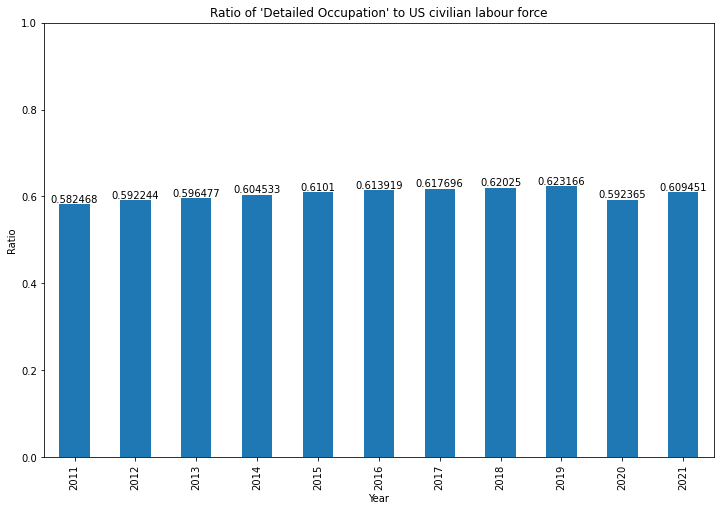

In [16]:
# Ratio of 'Detailed Occupation' to US civilian labour force

plt.figure(figsize=(12, 8))
fig = pd.Series((detailed_sum_arr/total_arr).reshape(11,)).plot(kind='bar')
fig.set_xticklabels(year)
fig.bar_label(fig.containers[0], label_type='edge')
fig.set_title('Ratio of \'Detailed Occupation\' to US civilian labour force')
fig.set_xlabel('Year')
fig.set_ylabel('Ratio')
fig.set_ylim([0,1])

plt.savefig("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Report/Figures/Proportion Detailed")

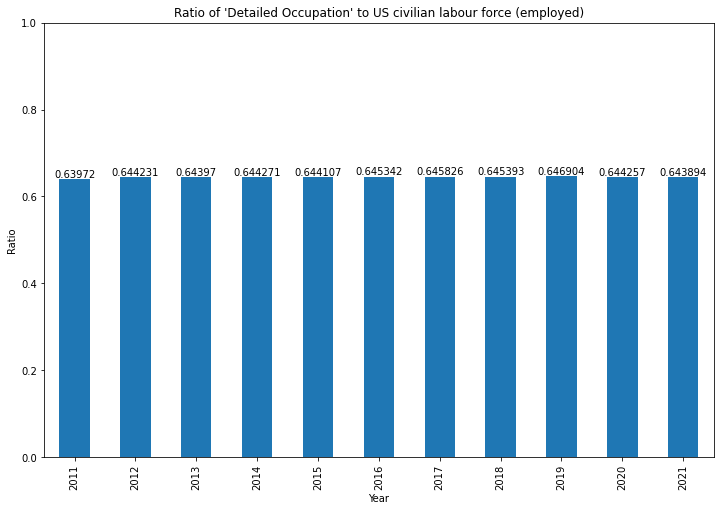

In [17]:
# Ratio of 'Detailed Occupation' to US civilian labour force (employed)

plt.figure(figsize=(12, 8))
fig = pd.Series((detailed_sum_arr/total_employed_arr).reshape(11,)).plot(kind='bar')
fig.set_xticklabels(year)
fig.bar_label(fig.containers[0], label_type='edge')
fig.set_title('Ratio of \'Detailed Occupation\' to US civilian labour force (employed)')
fig.set_xlabel('Year')
fig.set_ylabel('Ratio')
fig.set_ylim([0,1])

plt.savefig("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Report/Figures/Proportion Detailed (employed)")

In [10]:
# Major Group

major=joint_processed[(joint_processed['Minor Group']=='-')&(joint_processed['Broad Group']=='-')&(joint_processed['Detailed Occupation']=='-')]
major_sum=major.groupby(['Year']).sum()
major_sum_arr=major_sum['Total'].to_numpy()

major_sum_arr=major_sum_arr.reshape(-1,1)

#plt.bar(year,(major_sum_arr/total_arr).reshape(11,))     # Proportion of Major Group occupations wrt total employed
# print((major_sum_arr/total_arr))

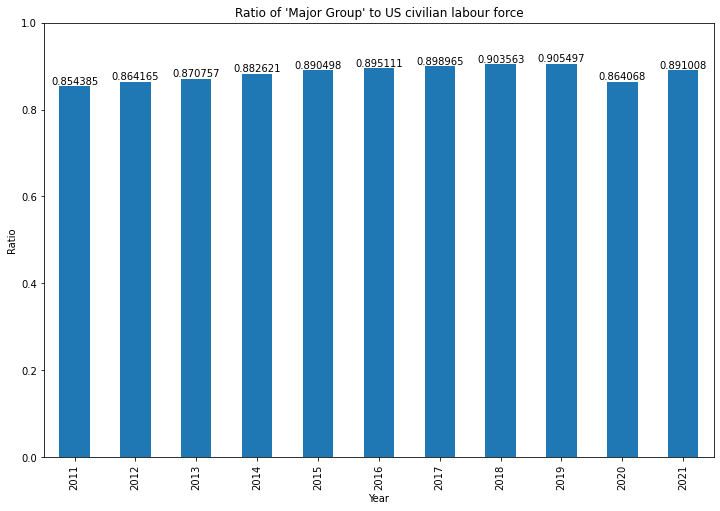

In [18]:
# Ratio of 'Major Group' to US civilian labour force

plt.figure(figsize=(12, 8))
fig = pd.Series((major_sum_arr/total_arr).reshape(11,)).plot(kind='bar')
fig.set_xticklabels(year)
fig.bar_label(fig.containers[0], label_type='edge')
fig.set_title('Ratio of \'Major Group\' to US civilian labour force')
fig.set_xlabel('Year')
fig.set_ylabel('Ratio')
fig.set_ylim([0,1])

plt.savefig("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Report/Figures/Proportion Major")

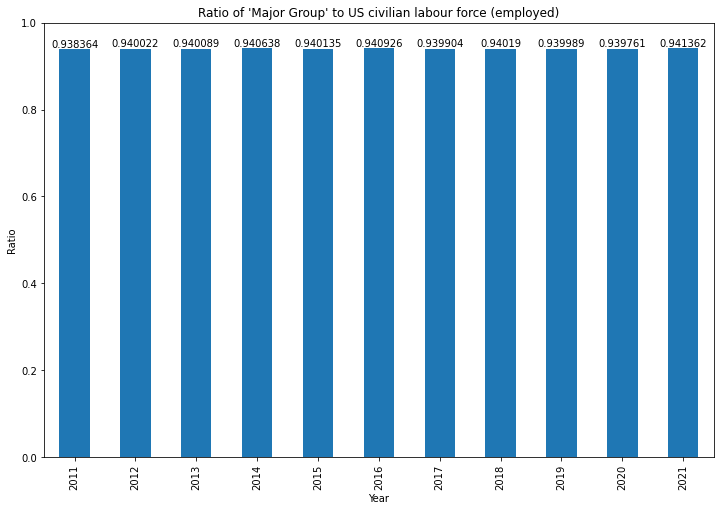

In [19]:
# Ratio of 'Major Group' to US civilian labour force (employed)

plt.figure(figsize=(12, 8))
fig = pd.Series((major_sum_arr/total_employed_arr).reshape(11,)).plot(kind='bar')
fig.set_xticklabels(year)
fig.bar_label(fig.containers[0], label_type='edge')
fig.set_title('Ratio of \'Major Group\' to US civilian labour force (employed)')
fig.set_xlabel('Year')
fig.set_ylabel('Ratio')
fig.set_ylim([0,1])

plt.savefig("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Report/Figures/Proportion Major (employed)")

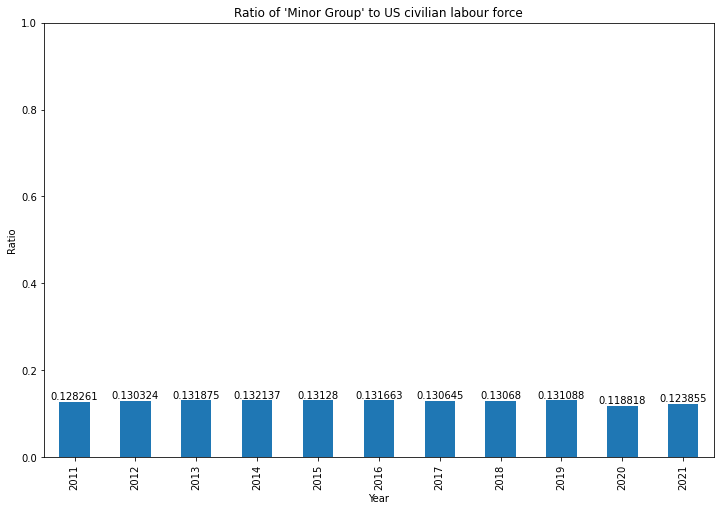

In [21]:
# Ratio of 'Minor Group' to US civilian labour force

minor=joint_processed[(joint_processed['Minor Group']!='-')&(joint_processed['Broad Group']=='-')&(joint_processed['Detailed Occupation']=='-')]
minor_sum=minor.groupby(['Year']).sum()
minor_sum_arr=minor_sum['Total'].to_numpy()

minor_sum_arr=minor_sum_arr.reshape(-1,1)

plt.figure(figsize=(12, 8))
fig = pd.Series((minor_sum_arr/total_arr).reshape(11,)).plot(kind='bar')
fig.set_xticklabels(year)
fig.bar_label(fig.containers[0], label_type='edge')
fig.set_title('Ratio of \'Minor Group\' to US civilian labour force')
fig.set_xlabel('Year')
fig.set_ylabel('Ratio')
fig.set_ylim([0,1])

plt.savefig("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Report/Figures/Proportion Minor")

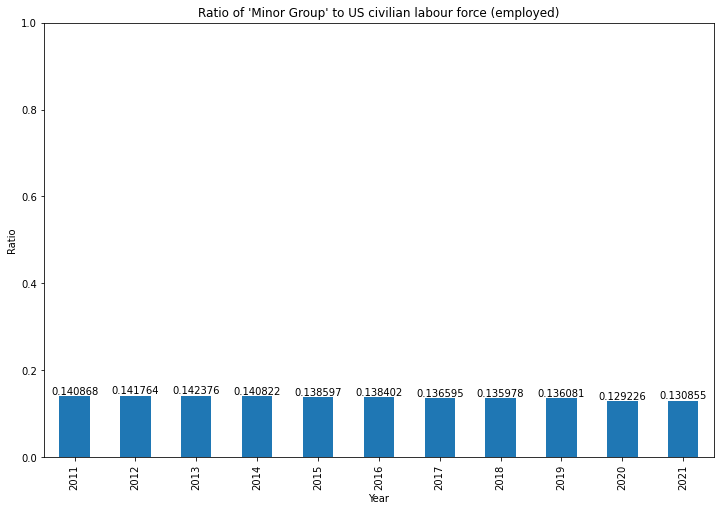

In [22]:
# Ratio of 'Minor Group' to US civilian labour force (employed)

plt.figure(figsize=(12, 8))
fig = pd.Series((minor_sum_arr/total_employed_arr).reshape(11,)).plot(kind='bar')
fig.set_xticklabels(year)
fig.bar_label(fig.containers[0], label_type='edge')
fig.set_title('Ratio of \'Minor Group\' to US civilian labour force (employed)')
fig.set_xlabel('Year')
fig.set_ylabel('Ratio')
fig.set_ylim([0,1])

plt.savefig("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Report/Figures/Proportion Minor (employed)")

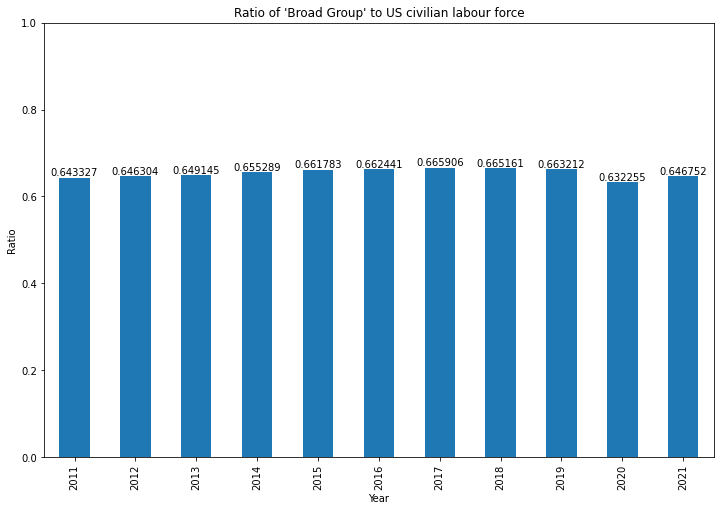

In [23]:
# Ratio of 'Broad Group' to US civilian labour force

broad=joint_processed[(joint_processed['Minor Group']!='-')&(joint_processed['Broad Group']!='-')&(joint_processed['Detailed Occupation']=='-')]
broad_sum=broad.groupby(['Year']).sum()
broad_sum_arr=broad_sum['Total'].to_numpy()

broad_sum_arr=broad_sum_arr.reshape(-1,1)

plt.figure(figsize=(12, 8))
fig = pd.Series((broad_sum_arr/total_arr).reshape(11,)).plot(kind='bar')
fig.set_xticklabels(year)
fig.bar_label(fig.containers[0], label_type='edge')
fig.set_title('Ratio of \'Broad Group\' to US civilian labour force')
fig.set_xlabel('Year')
fig.set_ylabel('Ratio')
fig.set_ylim([0,1])

plt.savefig("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Report/Figures/Proportion Broad")

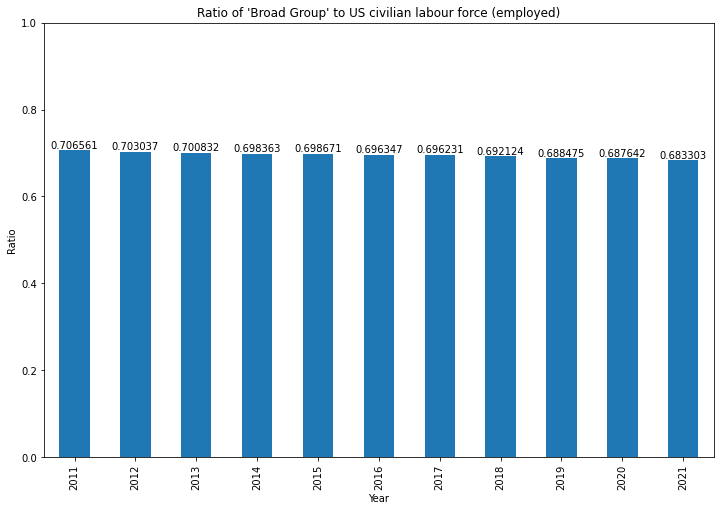

In [24]:
# Ratio of 'Broad Group' to US civilian labour force (employed)

plt.figure(figsize=(12, 8))
fig = pd.Series((broad_sum_arr/total_employed_arr).reshape(11,)).plot(kind='bar')
fig.set_xticklabels(year)
fig.bar_label(fig.containers[0], label_type='edge')
fig.set_title('Ratio of \'Broad Group\' to US civilian labour force (employed)')
fig.set_xlabel('Year')
fig.set_ylabel('Ratio')
fig.set_ylim([0,1])

plt.savefig("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Report/Figures/Proportion Broad (employed)")

In [25]:
# Potential Support Ratio (PSR)

young=joint_processed.iloc[:,2:7].sum(axis=1)
old=joint_processed['65<=']

psr=old/young
psr=pd.concat([joint_processed[['Occupation','Year','Major Group','Minor Group','Broad Group','Detailed Occupation']],psr],axis=1)
psr=psr.rename(columns={0:'PSR'})
psr_major = psr[(psr['Minor Group']=='-')&(joint_processed['Broad Group']=='-')&(joint_processed['Detailed Occupation']=='-')]

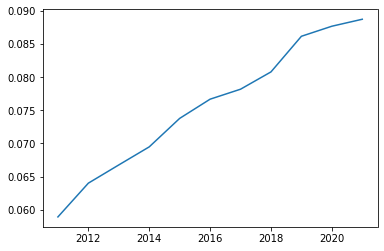

In [26]:
# PSR mean for Major Groups against Year

psr_major_mean=psr_major.loc[psr['PSR']!=np.inf,['Year','PSR']].groupby('Year').agg('mean')     # Note than certain ratios are inf because those occupations have zero young people; need to filter them out first
plt.plot(psr_major_mean)      # Change in ratio over Major Groups over the years

plt.savefig("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Report/Figures/PSR Mean for Major Groups against Year")

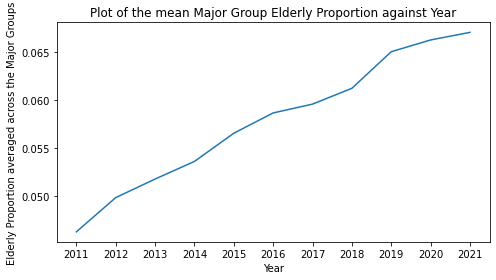

In [27]:
# Elderly Proportion

total_prop = joint_processed.iloc[:,1]
prop = old/total_prop
prop=pd.concat([joint_processed[['Occupation','Year','Total','Major Group','Minor Group','Broad Group','Detailed Occupation']],prop],axis=1)
prop=prop.rename(columns={0:'Elderly Proportion'})
prop_major = prop[(prop['Minor Group']=='-')&(joint_processed['Broad Group']=='-')&(joint_processed['Detailed Occupation']=='-')]

prop_major_mean=prop_major[['Year','Elderly Proportion']].groupby('Year').agg('mean')     # Note than certain ratios are inf because those occupations have zero young people; need to filter them out first
plt.rcParams["figure.figsize"] = [7.00, 4]
plt.rcParams["figure.autolayout"] = True
plt.plot(range(len(prop_major_mean)),prop_major_mean)      # Change in ratio over Major Groups over the years
plt.xticks(range(len(prop_major_mean)), prop_major_mean.index)
plt.title('Plot of the mean Major Group Elderly Proportion against Year')
plt.xlabel('Year')
plt.ylabel('Elderly Proportion averaged across the Major Groups')
#plt.grid()
#plt.show()
plt.savefig("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Report/Figures/Mean Major Group Elderly Proportion against Year")



In [28]:
# # plot groupby results on the same canvas 
# fig, ax = plt.subplots(figsize=(18,16)) 
# #color = iter(plt.cm.rainbow(np.linspace(0, 1, 21)))
# style = [':','--','-']
# style+=style+style+style+style+style+style
# i=0
# for id, group in psr_major.groupby('Occupation'): 
#     #c=next(color)
#     s=style[i]
#     group.plot(y='PSR', x='Year', title='Plot of PSR vs Year', ax=ax,label=id,linestyle=s)
#     i+=1
# #ratio_major.groupby('Occupation').plot(kind='line', x = "Year", y = "Ratio", ax=ax,legend=True)
# plt.ylabel('Potential support ratio')
# plt.show()

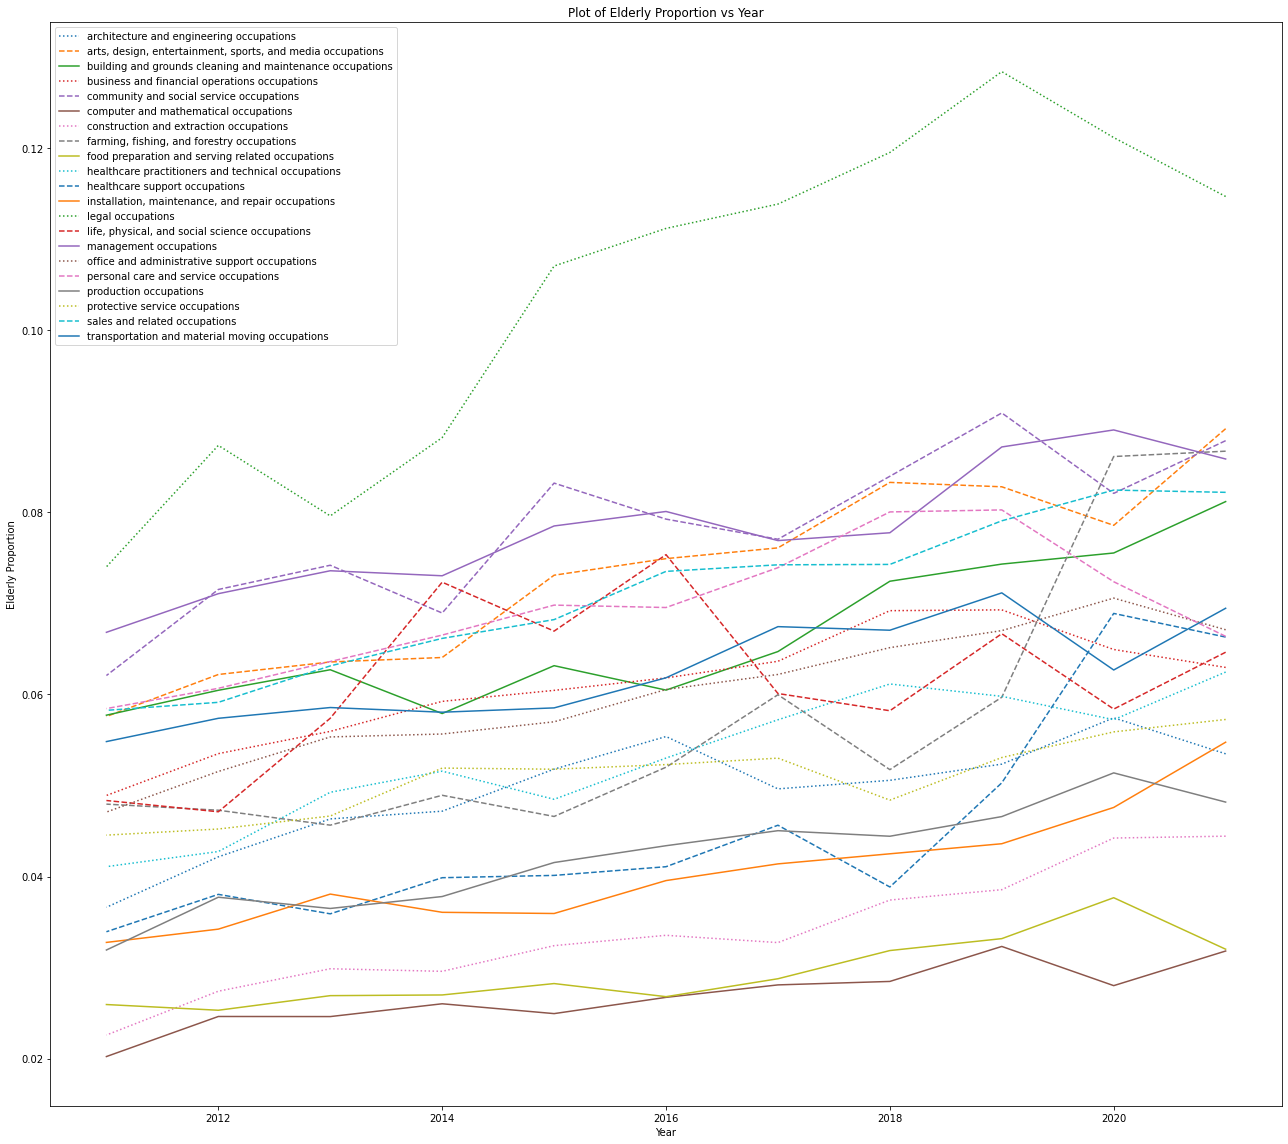

In [29]:
# plot groupby results on the same canvas 
fig, ax = plt.subplots(figsize=(18,16)) 
#color = iter(plt.cm.rainbow(np.linspace(0, 1, 21)))
style = [':','--','-']
style+=style+style+style+style+style+style
i=0
for id, group in prop_major.groupby('Occupation'): 
    #c=next(color)
    s=style[i]
    group.plot(y='Elderly Proportion', x='Year', title='Plot of Elderly Proportion vs Year', ax=ax,label=id,linestyle=s)
    i+=1
#ratio_major.groupby('Occupation').plot(kind='line', x = "Year", y = "Ratio", ax=ax,legend=True)
plt.ylabel('Elderly Proportion')
#plt.show()

plt.savefig("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Report/Figures/Elderly Proportion against Year")

In [100]:
total_prop = joint_processed.iloc[:,1]
prop = old/total_prop
prop

0       0.085853
1       0.089043
2       0.087174
3       0.077753
4       0.076893
          ...   
8146    0.055556
8147    0.037736
8148    0.037736
8149    0.043478
8150    0.043478
Length: 8151, dtype: float64

In [31]:
ratio_detailed=proportion[proportion['Detailed Occupation']!='-']
ratio_detailed_mean=ratio_detailed.loc[ratio['Ratio']!=np.inf,['Year','Ratio']].groupby('Year').agg('mean')     # Note than certain ratios are inf because those occupations have zero young people; need to filter them out first
plt.plot(ratio_detailed_mean)      # Change in ratio over Detailed Occupations over the years


NameError: name 'ratio' is not defined

In [28]:
# ratio[ratio['Ratio']==np.inf]

In [32]:
# Elderly to young ratio

ratio_two_years=ratio_major[(ratio_major['Year']==2021)|(ratio_major['Year']==2011)]
ratio_2011=ratio_two_years.loc[ratio_two_years['Year']==2011,'Ratio'].to_numpy()
ratio_2021=ratio_two_years.loc[ratio_two_years['Year']==2021,'Ratio'].to_numpy()

plt.barh(ratio_two_years.drop_duplicates('Occupation')['Occupation'],(ratio_2021-ratio_2011)/ratio_2011)
plt.title('Percentage change of ratio from 2011 to 2021 among Major Groups')        # Percentage change of ratio from 2011 to 2021 among Major Groups

NameError: name 'ratio_major' is not defined

Text(0.5, 1.0, 'Percentage change of ratio from 2011 to 2021 among Major Groups')

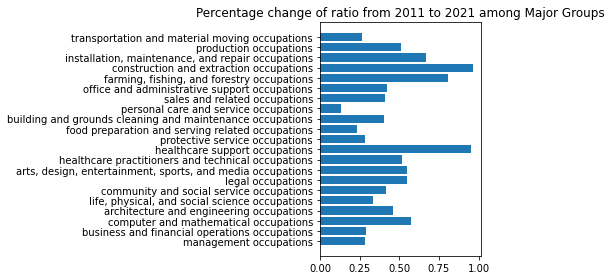

In [33]:
# Elderly Proportion

prop_two_years=prop_major[(prop_major['Year']==2021)|(prop_major['Year']==2011)]
prop_2011=prop_two_years.loc[prop_two_years['Year']==2011,'Elderly Proportion'].to_numpy()
prop_2021=prop_two_years.loc[prop_two_years['Year']==2021,'Elderly Proportion'].to_numpy()
percentage_change = pd.DataFrame(np.concatenate([prop_two_years.drop_duplicates('Occupation')['Occupation'].to_numpy().reshape(21,1),((prop_2021-prop_2011)/prop_2011).reshape(21,1)],axis=1))
percentage_change = percentage_change.sort_values([1],ascending=True)

plt.barh(prop_two_years.drop_duplicates('Occupation')['Occupation'],(prop_2021-prop_2011)/prop_2011)
plt.title('Percentage change of ratio from 2011 to 2021 among Major Groups')        # Percentage change of ratio from 2011 to 2021 among Major Groups

Text(0.5, 1.0, 'Percentage change from 2011 to 2021')

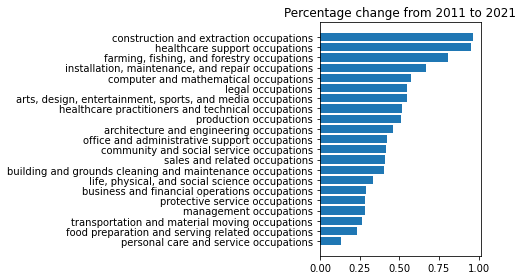

In [34]:
plt.barh(percentage_change[0],percentage_change[1])
plt.title('Percentage change from 2011 to 2021')

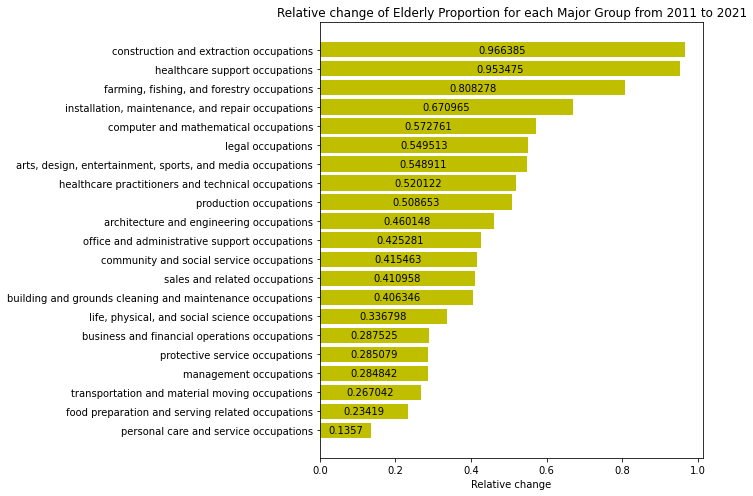

In [107]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
bars = ax.barh(percentage_change[0],percentage_change[1],color='y')
plt.title('Relative change of Elderly Proportion for each Major Group from 2011 to 2021')
plt.xlabel('Relative change')
ax.bar_label(bars,label_type='center')
#plt.show()

plt.savefig("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Report/Figures/Relative change of EP")

Automatability Data

In [36]:
changes2010=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data cleaning/Changes.xlsx",sheet_name=0)
changes2018=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data cleaning/Changes.xlsx",sheet_name=1)

# Remove unwanted columns

changes2010.drop(changes2010.columns[[0,2,3,4,5,6,7,8,9,10,11,14]],axis=1,inplace=True)
changes2018.drop(changes2018.columns[[0,2,3,4,5,6,7,8,9,10,11,14]],axis=1,inplace=True)

# Lower case all strings
changes2010['Occupation']=changes2010['Occupation'].str.lower()
changes2010['Action']=changes2010['Action'].str.lower()
changes2010['Map to']=changes2010['Map to'].str.lower()

changes2018['Occupation']=changes2018['Occupation'].str.lower()
changes2018['Action']=changes2018['Action'].str.lower()
changes2018['Map to']=changes2018['Map to'].str.lower()

# Remove all rows with 'Action' == '-' since no action needs to be taken

changes2018.drop(index=changes2018[changes2018['Action']=='-'].index,inplace=True)
changes2010.drop(index=changes2010[changes2010['Action']=='-'].index,inplace=True)

In [37]:
# Import automatability data for the US

auto_data=pd.read_excel('/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/US_data_email.xls')


In [38]:
auto_data['Occupation Name']=auto_data['Occupation Name'].str.lower()
test=auto_data[['Occupation Name','BLS codes']]

In [39]:
test2=changes2010.copy()

In [40]:
joint_test2 = pd.merge(left = auto_data, 
         right = test2[test2['Action']=='change'],
        how= 'left',
        left_on='Occupation Name',
        right_on='Occupation')

joint_test2.loc[joint_test2['Action'].notnull(),'Occupation Name']=joint_test2.loc[joint_test2['Action'].notnull(),'Map to']     # Rename
joint_test2.drop(joint_test2.columns[[-1,-2,-3]],axis=1,inplace=True)      # Drop unnecessary columns

auto_processed=joint_test2
auto_processed.rename(columns={'Occupation Name':'Occupation'},inplace=True)

In [41]:
auto_processed

,Occupation,BLS codes,Category Label,Probability of Computerisation,Assisting and caring for others,Persuasion,Negotiation,Social perceptiveness,Fine arts,Originality,...,Cramped work space,Employment in Thousands,Income (Thousands USD),High school diploma or equivalent,Some college,no degree,Associate's degree,Bachelor's degree,Master's degree,Training set automatable labels
0,recreational therapists,29-1125_,4,0.002751,77.0,52.0,48.0,57.0,35.0,54.0,...,27.0,0.0224,39.41,98.1,88.3,75.4,68.7,13.8,1.1,NaN
1,first-line supervisors of mechanics installers...,49-1011_,10,0.002978,58.0,50.0,54.0,54.0,0.0,54.0,...,27.0,0.4312,59.15,92.0,54.0,23.7,12.1,2.2,0.2,NaN
2,emergency management directors,11-9161_,1,0.003012,65.0,55.0,50.0,57.0,0.0,57.0,...,28.0,0.0121,55.36,97.9,82.3,59.2,48.5,15.3,2.6,NaN
3,mental health and substance abuse social workers,21-1023_,3,0.003094,80.0,55.0,52.0,79.0,8.0,52.0,...,23.0,0.1261,38.60,98.8,92.7,82.5,76.6,34.4,1.8,NaN
4,audiologists,29-1181_,4,0.003259,73.0,45.0,37.0,57.0,8.0,54.0,...,12.0,0.0130,66.66,99.9,97.8,95.1,94.2,89.5,34.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,insurance underwriters,13-2053_,1,0.989080,17.0,37.0,39.0,45.0,0.0,37.0,...,0.0,0.1018,59.29,99.5,81.2,58.1,50.0,7.5,1.5,1.0
698,mathematical technicians,15-2091_,2,0.989080,17.0,24.0,12.0,5.0,0.0,37.0,...,0.0,0.0011,44.88,100.0,99.2,94.5,88.8,54.5,24.4,NaN
699,sewers hand,51-6051_,11,0.989570,21.0,27.0,29.0,29.0,35.0,34.0,...,9.0,0.0104,23.14,73.3,37.8,20.9,14.1,2.9,0.6,NaN
700,title examiners abstractors and searchers,23-2093_,3,0.990200,17.0,39.0,37.0,39.0,0.0,32.0,...,2.0,0.0590,38.99,98.2,79.3,52.0,38.6,10.9,4.1,NaN


In [42]:
joint_auto=pd.merge(right=auto_processed, left=joint_processed[joint_processed['Detailed Occupation']!='-'],how='inner',left_on='Occupation',right_on='Occupation')  #Combined rows

In [43]:
joint_auto.drop(columns={'BLS codes'},inplace=True)

In [69]:
joint_auto[joint_auto['Year']==2021]['Total']

0       1664.0
11      1085.0
22        72.0
33       715.0
44      1307.0
         ...  
2585     623.0
2596     301.0
2607      22.0
2618    1652.0
2629      87.0
Name: Total, Length: 240, dtype: float64

In [44]:
auto_arr=joint_auto[['Year','Total']].groupby(['Year']).agg(sum).to_numpy()

Text(0, 0.5, 'Ratio')

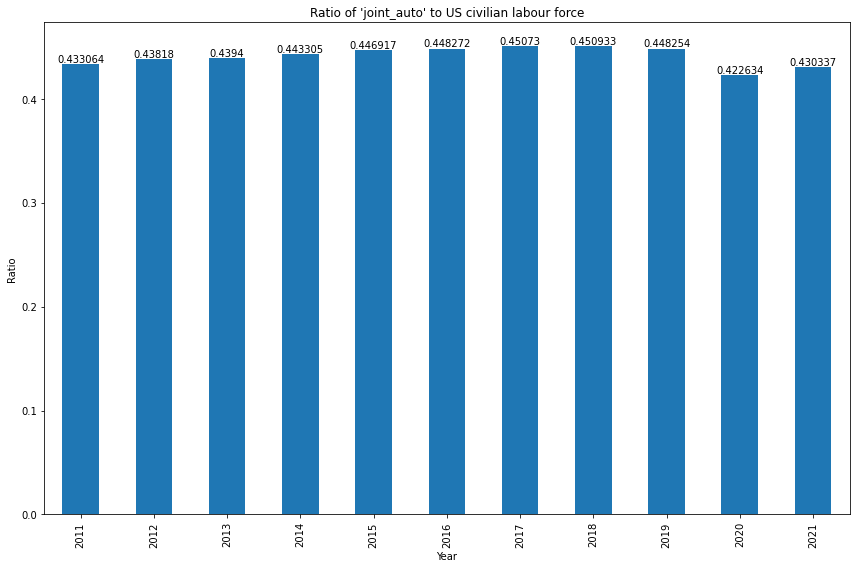

In [45]:
plt.figure(figsize=(12, 8))
fig = pd.Series((auto_arr/total_arr).reshape(11,)).plot(kind='bar')
fig.set_xticklabels(year)
fig.bar_label(fig.containers[0], label_type='edge')
fig.set_title('Ratio of \'joint_auto\' to US civilian labour force')
fig.set_xlabel('Year')
fig.set_ylabel('Ratio')

In [46]:
joint_auto.drop(joint_auto.iloc[:,-18:-1],axis=1,inplace=True)

In [47]:
joint_auto['Elderly Proportion'] = joint_auto['65<=']/joint_auto['Total']
joint_auto.fillna(0,inplace=True)

In [48]:
joint_auto2=joint_auto[['Occupation','Probability of Computerisation','Elderly Proportion','Category Label']].groupby(['Occupation']).agg('mean')

In [49]:
joint_auto_sorted2=joint_auto2.sort_values('Probability of Computerisation')

In [50]:
joint_auto2['Probability of Computerisation'].corr(joint_auto2['Elderly Proportion'],method='pearson')

-0.02495456883002524

In [51]:
#joint_auto_sorted2.groupby('Category Label').plot(x='Probability of Computerisation',y='Elderly Proportion',legend=True)

Merge with 'relative change of Elderly Ratio from 2011 to 2021'

In [52]:
joint_auto2011 = joint_auto[joint_auto['Year']==2011][['Occupation','Elderly Proportion','Probability of Computerisation']]
joint_auto2021 = joint_auto[joint_auto['Year']==2021][['Occupation','Category Label','Elderly Proportion','Probability of Computerisation']]

joint_auto2011_arr = joint_auto2011['Elderly Proportion'].to_numpy()
joint_auto2021_arr = joint_auto2021['Elderly Proportion'].to_numpy()

In [53]:
joint_auto_change=pd.DataFrame((joint_auto2021_arr-joint_auto2011_arr)/joint_auto2011_arr)

<ipython-input-53-97dae5278a1e>:1: RuntimeWarning: divide by zero encountered in true_divide
  joint_auto_change=pd.DataFrame((joint_auto2021_arr-joint_auto2011_arr)/joint_auto2011_arr)
<ipython-input-53-97dae5278a1e>:1: RuntimeWarning: invalid value encountered in true_divide
  joint_auto_change=pd.DataFrame((joint_auto2021_arr-joint_auto2011_arr)/joint_auto2011_arr)


In [54]:
joint_auto_change = joint_auto2021.reset_index().join(joint_auto_change)

In [55]:
joint_auto3 = joint_auto_change[joint_auto_change[0].notnull()]
joint_auto3 = joint_auto3[joint_auto3[0]!=np.inf]

In [56]:
joint_auto3['Probability of Computerisation'].corr(joint_auto3[0],method='kendall')

0.019144943774686313

In [65]:
joint_auto2021

,Occupation,Category Label,Elderly Proportion,Probability of Computerisation
0,chief executives,1,0.122596,0.015226
11,general and operations managers,1,0.043318,0.159460
22,advertising and promotions managers,1,0.027778,0.038603
33,computer and information systems managers,1,0.029371,0.035080
44,financial managers,1,0.053558,0.069185
...,...,...,...,...
2585,industrial truck and tractor operators,12,0.035313,0.934820
2596,cleaners of vehicles and equipment,12,0.049834,0.367560
2607,machine feeders and offbearers,12,0.090909,0.930580
2618,stockers and order fillers,7,0.046610,0.640190


In [57]:
# Correlation values (Group by Category Label)

pearson3=joint_auto3.groupby('Category Label')[['Probability of Computerisation',0]].corr('pearson').iloc[0::2,-1]
spearman3=joint_auto3.groupby('Category Label')[['Probability of Computerisation',0]].corr('spearman').iloc[0::2,-1]
kendall3=joint_auto3.groupby('Category Label')[['Probability of Computerisation',0]].corr('kendall').iloc[0::2,-1]

In [58]:
joint_auto3_sorted=joint_auto3.sort_values(by=['Probability of Computerisation'])
joint_auto3_sorted=joint_auto3_sorted.rename(columns={0:'Relative change of EP for Detailed Occupations'})

In [171]:
# plt.plot(joint_auto3.sort_values(by=['Probability of Computerisation'])['Probability of Computerisation'],joint_auto3.sort_values(by=['Probability of Computerisation'])[0])

In [182]:
# joint_auto3_sorted.groupby('Category Label').plot(kind='scatter',x='Probability of Computerisation',y='Relative change of EP for Detailed Occupations',legend=False)
# #plt.ylabel('Relative change of EP for Detailed Occupations')


In [223]:
# # Category Label 1-12

# for i in range(12):

#     plt.scatter(joint_auto3[joint_auto3['Category Label']==i+1]['Probability of Computerisation'],joint_auto3[joint_auto3['Category Label']==i+1][0])
#     plt.xlabel('Probability of Computerisation')
#     plt.ylabel('Relative change of EP for Detailed Occupations')

#     plt.savefig("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Report/Figures/Scatterplot"+str(i+1))
#     plt.show()

In [224]:
# joint_auto3_sorted.plot(x='Probability of Computerisation',y=0,legend=False)
# plt.ylabel('Relative change for Detailed Occupations')

# plt.savefig("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Report/Figures/Relative change of EP for DO")

In [61]:
joint_auto3_sorted

,index,Occupation,Category Label,Elderly Proportion,Probability of Computerisation,Relative change of EP for Detailed Occupations
85,935,recreational therapists,4,0.055556,0.002751,-0.222222
81,891,audiologists,4,0.117647,0.003259,1.235294
82,902,occupational therapists,4,0.044444,0.003481,0.244444
76,836,dietitians and nutritionists,4,0.051282,0.003894,0.046154
13,143,lodging managers,1,0.094828,0.003921,-0.122845
...,...,...,...,...,...,...
154,1694,data entry keyers,7,0.054545,0.985050,0.821818
67,737,library technicians,3,0.157895,0.986160,1.921053
32,352,tax preparers,1,0.227723,0.987120,0.391639
30,330,insurance underwriters,1,0.046875,0.989080,0.371094


In [96]:
joint_auto3 = pd.merge(left=joint_auto3,right=joint_auto[joint_auto['Year']==2021][['Occupation','Total']],left_on='Occupation',right_on='Occupation',how='left')

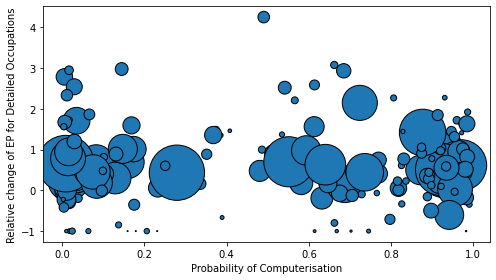

In [98]:
plt.scatter(joint_auto3['Probability of Computerisation'],joint_auto3[0],s=joint_auto3['Total'],edgecolors='black')
plt.ylabel('Relative change of EP for Detailed Occupations')
plt.xlabel('Probability of Computerisation')

plt.savefig("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Report/Figures/Scatter Relative change of EP for DO")

Check bias-ness of data

In [102]:
#prop_detailed=prop[prop['Detailed Occupation']!='-']
prop_major


,Occupation,Year,Total,Major Group,Minor Group,Broad Group,Detailed Occupation,Elderly Proportion
0,management occupations,2021,18986.0,11-0000,-,-,-,0.085853
1,management occupations,2020,18564.0,11-0000,-,-,-,0.089043
2,management occupations,2019,18985.0,11-0000,-,-,-,0.087174
3,management occupations,2018,18263.0,11-0000,-,-,-,0.077753
4,management occupations,2017,17804.0,11-0000,-,-,-,0.076893
...,...,...,...,...,...,...,...,...
6881,transportation and material moving occupations,2015,9125.0,53-0000,-,-,-,0.058521
6882,transportation and material moving occupations,2014,9010.0,53-0000,-,-,-,0.058047
6883,transportation and material moving occupations,2013,8709.0,53-0000,-,-,-,0.058560
6884,transportation and material moving occupations,2012,8540.0,53-0000,-,-,-,0.057377


In [103]:
# Check sample mean against population mean

print('Population mean is', prop_major['Elderly Proportion'].mean())
print('Sample mean is', joint_auto['Elderly Proportion'].mean())

# Check sample variance against population variance

print('Population variance is', prop_major['Elderly Proportion'].var())
print('Sample variance is', joint_auto['Elderly Proportion'].var())


Population mean is 0.05782339744177376
Sample mean is 0.05157576602964187
Population variance is 0.0003942722048791945
Sample variance is 0.003342935915578313


In [104]:
prop_major=pd.merge(left=prop_major,right=prop_major.groupby('Year')['Total'].sum(),left_on='Year',right_on='Year',how='left')
prop_major['Proportion']=prop_major['Total_x']/prop_major['Total_y']

joint_auto4=pd.merge(left=joint_auto[['Occupation','Total','Major Group','Minor Group','Broad Group','Detailed Occupation','Elderly Proportion','Year','Category Label']],right=prop_major[['Occupation','Year','Major Group']],left_on=['Major Group','Year'],right_on=['Major Group','Year'],how='left')

joint_auto4_sample=pd.DataFrame(joint_auto4.groupby(['Occupation_y','Year'])['Total'].sum())
joint_auto4_sample_total=pd.DataFrame(joint_auto4.groupby('Year')['Total'].sum())

joint_auto4_sample=pd.merge(left=prop_major[['Occupation','Year','Major Group']],right=joint_auto4_sample,left_on=['Occupation','Year'],right_on=['Occupation_y','Year'],how='left')

joint_auto4_sample=pd.merge(left=joint_auto4_sample,right=joint_auto4_sample_total,left_on='Year',right_on='Year',how='left')

joint_auto4_sample['Proportion']=joint_auto4_sample['Total_x']/joint_auto4_sample['Total_y']

# Create 'Difference between Proportions' column
joint_auto4=pd.merge(left=prop_major[['Occupation','Year','Proportion']],right=joint_auto4_sample[['Occupation','Year','Proportion']],left_on=['Occupation','Year'],right_on=['Occupation','Year'],how='left')
joint_auto4['Diff']=joint_auto4['Proportion_x']-joint_auto4['Proportion_y']


Text(0, 0.5, 'Population Proportion - Sample Proportion')

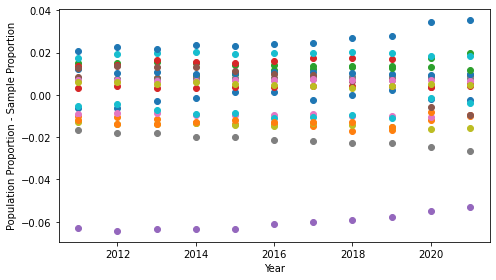

In [105]:
# Plot scatter plot for Diff against Year for all Major Groups

labels=joint_auto4['Occupation'].drop_duplicates()
for label in labels:
    plt.scatter(joint_auto4[joint_auto4['Occupation']==label]['Year'],joint_auto4[joint_auto4['Occupation']==label]['Diff'])
plt.xlabel('Year')
plt.ylabel('Population Proportion - Sample Proportion')

In [108]:
joint_auto4

,Occupation,Year,Proportion_x,Proportion_y,Diff
0,management occupations,2021,0.132183,0.134536,-0.002352
1,management occupations,2020,0.133658,0.135644,-0.001987
2,management occupations,2019,0.128204,0.125677,0.002527
3,management occupations,2018,0.124709,0.124608,0.000101
4,management occupations,2017,0.123534,0.125711,-0.002177
...,...,...,...,...,...
226,transportation and material moving occupations,2015,0.065214,0.041823,0.023391
227,transportation and material moving occupations,2014,0.065470,0.041869,0.023602
228,transportation and material moving occupations,2013,0.064365,0.042766,0.021599
229,transportation and material moving occupations,2012,0.063768,0.040938,0.022829


In [109]:
joint_auto4_sample

,Occupation,Year,Major Group,Total_x,Total_y,Proportion
0,management occupations,2021,11-0000,9333.0,69372.0,0.134536
1,management occupations,2020,11-0000,9215.0,67935.0,0.135644
2,management occupations,2019,11-0000,9213.0,73307.0,0.125677
3,management occupations,2018,11-0000,9107.0,73085.0,0.124608
4,management occupations,2017,11-0000,9084.0,72261.0,0.125711
...,...,...,...,...,...,...
226,transportation and material moving occupations,2015,53-0000,2937.0,70224.0,0.041823
227,transportation and material moving occupations,2014,53-0000,2894.0,69121.0,0.041869
228,transportation and material moving occupations,2013,53-0000,2920.0,68278.0,0.042766
229,transportation and material moving occupations,2012,53-0000,2780.0,67907.0,0.040938


Text(0, 0.5, 'Sample Proportion')

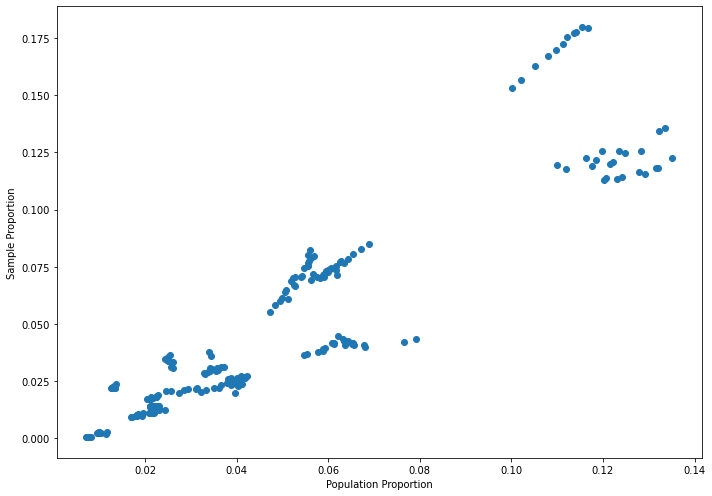

In [115]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
plt.scatter(x=joint_auto4['Proportion_x'],y=joint_auto4['Proportion_y'])
plt.xlabel('Population Proportion')
plt.ylabel('Sample Proportion')

Apply Gaussian Process

In [286]:
# # Import sklearn

# import sklearn as sk
# import sklearn.gaussian_process as gp

In [287]:
# kernel1=gp.kernels.RBF()

# joint_auto_train = joint_auto2.iloc[0:200]
# joint_auto_test = joint_auto2.iloc[200:240]

# gpr=gp.GaussianProcessRegressor(normalize_y=False,kernel=kernel1,n_restarts_optimizer=20)
# gpr.fit(joint_auto_train[['Probability of Computerisation','Category Label']],joint_auto_train['Elderly Ratio'])

# gpr.predict(joint_auto_test[['Probability of Computerisation','Category Label']])

# gpr.score(joint_auto_test[['Probability of Computerisation','Category Label']],joint_auto_test['Elderly Ratio'])

Relative change (Gaussian Process)

In [292]:
# kernel3=gp.kernels.ExpSineSquared()+gp.kernels.WhiteKernel() #length_scale_bounds=(1e-6,1e8)

# joint_auto3

# joint_auto_train3 = joint_auto3.iloc[0:200]
# joint_auto_test3 = joint_auto3.iloc[200:]

# gpr3=gp.GaussianProcessRegressor(normalize_y=False,kernel=kernel3,n_restarts_optimizer=150)
# gpr3.fit(joint_auto_train3[['Probability of Computerisation','Category Label']],joint_auto_train3[0])

# gpr3.predict(joint_auto_test3[['Probability of Computerisation','Category Label']])

# gpr3.score(joint_auto_test3[['Probability of Computerisation','Category Label']],joint_auto_test3[0])